In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis

/var/folders/dp/jzw9_p792p12jh67s1z26q200000gn/T/ipykernel_19780/3283352142.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Create an empty list to store the dataframes
merged_df= pd.DataFrame()

data=('/Users/devbirchandthakuri/desktop/sales')

dfs=[]
# Iterate over the file names and read each file into a dataframe
for file_name in os.listdir(data):
     file_path = os.path.join(data, file_name)
     df=pd.read_csv(file_path)
     dfs.append(df)
merged_df=pd.concat(dfs)


# Write the merged dataframe to a CSV file
merged_df.to_csv('csv_file', index=False)

In [6]:
#Creating a variable to  read and display the CSV file in a dataframe
dfa=pd.read_csv('csv_file') 



In [7]:

dfa

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665.0,Macbook Pro Laptop,1.0,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905.0,AAA Batteries (4-pack),1.0,2.99,6/7/2019 19:02,"795 Pine St, Boston, MA 02215"
186846,222906.0,27in FHD Monitor,1.0,149.99,6/1/2019 19:29,"495 North St, New York City, NY 10001"
186847,222907.0,USB-C Charging Cable,1.0,11.95,6/22/2019 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908.0,USB-C Charging Cable,1.0,11.95,6/26/2019 18:35,"916 Main St, San Francisco, CA 94016"


In [9]:
dfa.isna().sum() # Checking null values

Order ID            900
Product             900
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    900
dtype: int64

In [10]:
dfa.dropna() # Removing all the null values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665.0,Macbook Pro Laptop,1.0,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905.0,AAA Batteries (4-pack),1.0,2.99,6/7/2019 19:02,"795 Pine St, Boston, MA 02215"
186846,222906.0,27in FHD Monitor,1.0,149.99,6/1/2019 19:29,"495 North St, New York City, NY 10001"
186847,222907.0,USB-C Charging Cable,1.0,11.95,6/22/2019 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908.0,USB-C Charging Cable,1.0,11.95,6/26/2019 18:35,"916 Main St, San Francisco, CA 94016"


In [11]:
dfa.info() #Get information about the data of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(3), object(3)
memory usage: 8.6+ MB


In [12]:
dfa.dropna(inplace=True) # .dropna() deletes all the null values

In [13]:
dfa.isna().sum() # The .isna() shows all the null or missing values in a dataframe and adding .sum() shows the total number of null values in each column

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
#Converting the datatypes of Quantity Ordered and Price Each into Integer
dfa['Quantity Ordered'] = dfa['Quantity Ordered'].astype(int) 
dfa['Price Each'] = dfa['Price Each'].astype(int)



In [15]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  int64  
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.9+ MB


In [16]:
dfa['Order Date'] = pd.to_datetime(dfa['Order Date']) #Converting the datatype of Order Date into datetime using to_datetime method


In [17]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  float64       
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  int64         
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [18]:
dfa['Month'] = dfa['Order Date'].dt.month #Extracting month from the Order Date using dt.month attribute and keeping it in a seperate column names 'Month'
dfa['Month'] = dfa['Month'].astype(int) #Setting the datatype for Month column



In [19]:
dfa

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665.0,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666.0,LG Washing Machine,1,600,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667.0,USB-C Charging Cable,1,11,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668.0,27in FHD Monitor,1,149,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669.0,USB-C Charging Cable,1,11,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905.0,AAA Batteries (4-pack),1,2,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6
186846,222906.0,27in FHD Monitor,1,149,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6
186847,222907.0,USB-C Charging Cable,1,11,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6
186848,222908.0,USB-C Charging Cable,1,11,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6


In [20]:
def city(address):
    return address.split(',')[1].strip()
dfa['City']=dfa['Purchase Address'].apply(city)


In [21]:
dfa

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,295665.0,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City
1,295666.0,LG Washing Machine,1,600,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City
2,295667.0,USB-C Charging Cable,1,11,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City
3,295668.0,27in FHD Monitor,1,149,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco
4,295669.0,USB-C Charging Cable,1,11,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta
...,...,...,...,...,...,...,...,...
186845,222905.0,AAA Batteries (4-pack),1,2,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,Boston
186846,222906.0,27in FHD Monitor,1,149,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,New York City
186847,222907.0,USB-C Charging Cable,1,11,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,San Francisco
186848,222908.0,USB-C Charging Cable,1,11,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,San Francisco


Text(0, 0.5, 'Number of saleas')

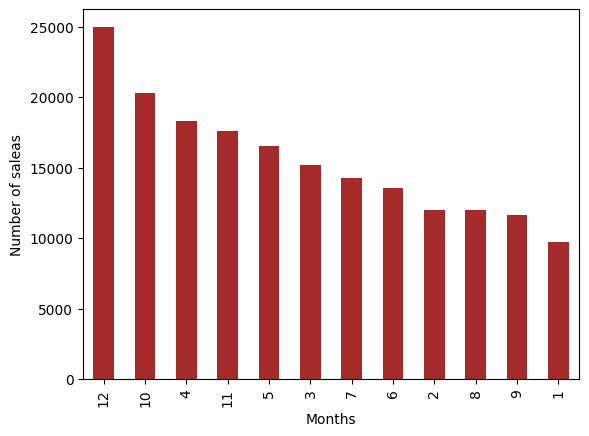

In [22]:
bar=dfa['Month'].value_counts().plot(kind='bar',color='brown') #Plots a bar graph based on the count of Months
plt.xlabel("Months") # Labels the horizontal plane as "Months"
plt.ylabel("Number of saleas") # Labels the vertical line as "Number of sales"


Month with best sales: 12
Earning of the best sale: 4591824


Text(0, 0.5, 'Sales Amount')

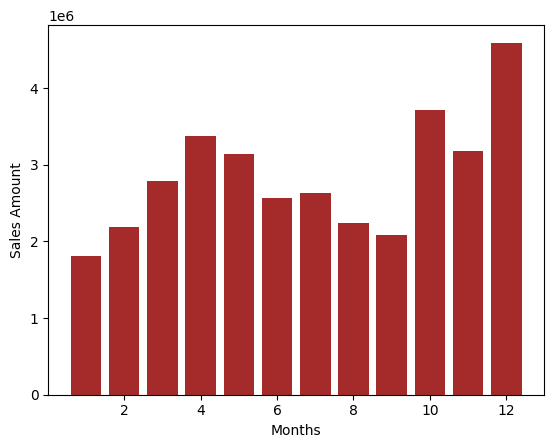

In [23]:

dfa['sales']=dfa['Quantity Ordered']*dfa['Price Each'] #Creating a new variable sales for sales report
sales=dfa.groupby('Month')['sales'].sum() # Groups the sales in terms of months
month=sales.idxmax() #Picks out the month with maximum sales
highsales= sales.loc[month]# Accessing the value of sales variable for month
print("Month with best sales:",month) #Printing the month with highest sale
print("Earning of the best sale:",highsales) # Printing the highest sales of the month
months=range(1,13)
plt.bar(months,sales,color='brown')
plt.xlabel("Months")
plt.ylabel("Sales Amount")

Text(0, 0.5, 'Products sold')

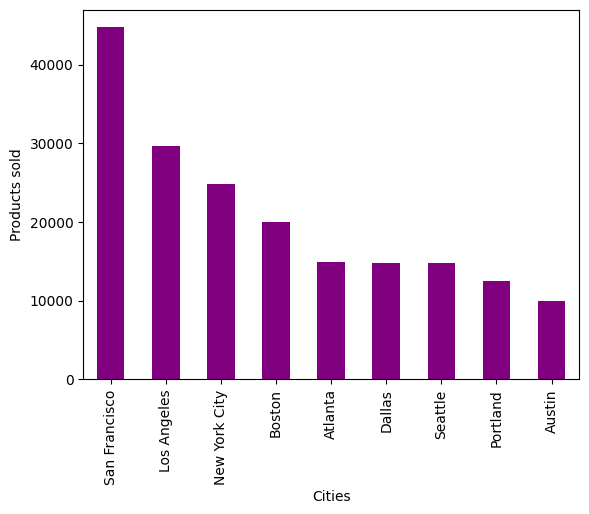

In [24]:

bar=dfa['City'].value_counts().plot(kind='bar',color='purple') 
plt.xlabel("Cities")
plt.ylabel("Products sold")

Text(0, 0.5, 'Quantity sold')

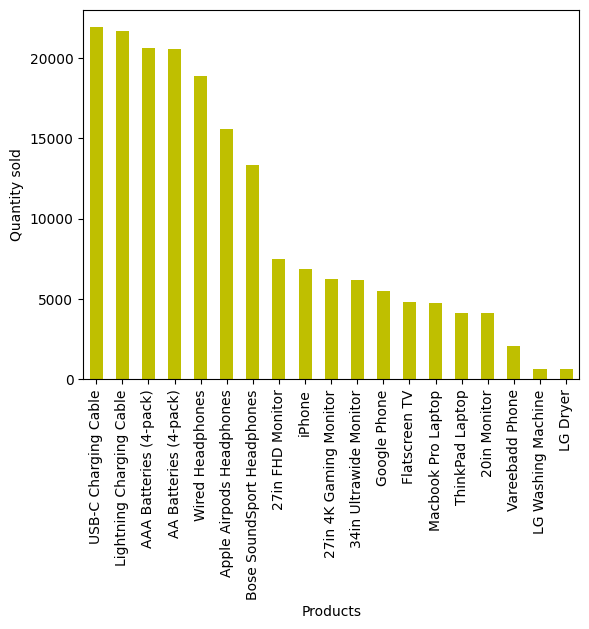

In [25]:

bar=dfa['Product'].value_counts().plot(kind='bar',color='y') 
plt.xlabel("Products")
plt.ylabel("Quantity sold")

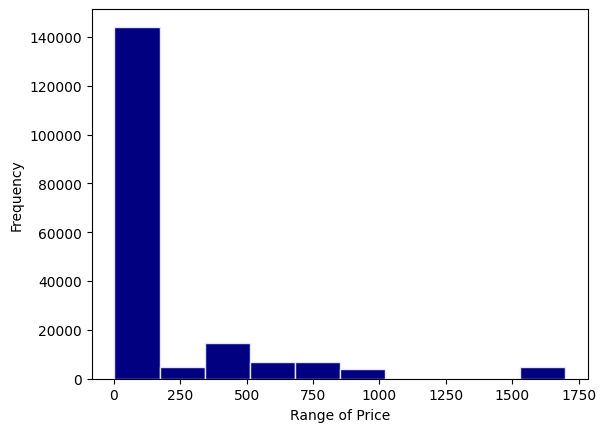

In [26]:
plt.hist(dfa['Price Each'], edgecolor='lavender',color='navy')
plt.xlabel("Range of Price")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Finding the sum, mean, standard deviation, skewness, and kurtosis of Price Each column.
from scipy.stats import skew, kurtosis

Price_sum = np.sum(dfa['Price Each']) 
Price_mean = np.mean(dfa['Price Each']) 
Price_std = np.std(dfa['Price Each']) 
Price_skewness = skew(dfa['Price Each']) 
Price_kurt = kurtosis(dfa['Price Each']) 


In [28]:
print("The total sum of prices is:",Price_sum)
print("The mean of all prices is:",Price_mean)
print("The standard deviation of prices is:",Price_std)
print("The skewness of the prices is:",Price_skewness)
print("The kurtosis of the prices is:",Price_kurt)


The total sum of prices is: 34150278
The mean of all prices is: 183.6530142511428
The standard deviation of prices is: 332.940704668076
The skewness of the prices is: 2.8706390346313775
The kurtosis of the prices is: 9.086390289521129


In [30]:
 #Displaying the correlations of the variables
dfa=dfa[['Order ID','Quantity Ordered','Price Each','Month']]
dfa.corr()

,Order ID,Quantity Ordered,Price Each,Month
Order ID,1.000000,0.000702,-0.002861,0.993063
Quantity Ordered,0.000702,1.000000,-0.148335,0.000791
Price Each,-0.002861,-0.148335,1.000000,-0.003379
Month,0.993063,0.000791,-0.003379,1.000000


<Axes: >

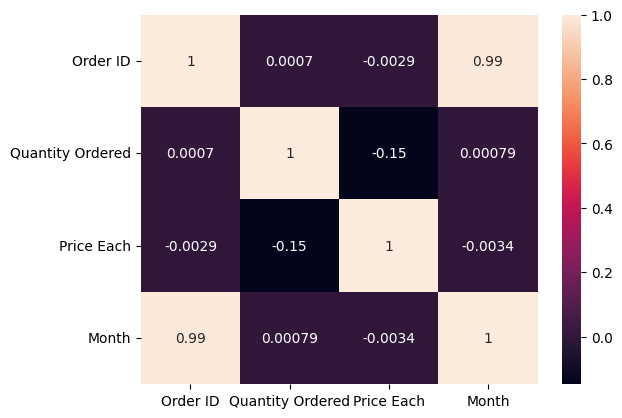

In [35]:
sns.heatmap(dfa.corr(), annot=True) #Plotting heatmap
